# COLUMN DESCRIPTION

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
loans = pd.read_csv('loan_data.csv')

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
loans.skew(),loans.kurt()

(credit.policy        -1.539621
 int.rate              0.164420
 installment           0.912522
 log.annual.inc        0.028668
 dti                   0.023941
 fico                  0.471260
 days.with.cr.line     1.155748
 revol.bal            11.161058
 revol.util            0.059985
 inq.last.6mths        3.584151
 delinq.2yrs           6.061793
 pub.rec               5.126434
 not.fully.paid        1.854592
 dtype: float64,
 credit.policy          0.370512
 int.rate              -0.224324
 installment            0.137908
 log.annual.inc         1.609004
 dti                   -0.900355
 fico                  -0.422312
 days.with.cr.line      1.937861
 revol.bal            259.655203
 revol.util            -1.116467
 inq.last.6mths        26.288131
 delinq.2yrs           71.433182
 pub.rec               38.781007
 not.fully.paid         1.439811
 dtype: float64)

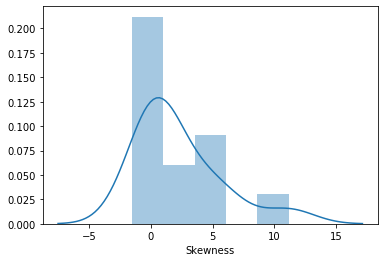

In [9]:
# Plot the Skewness of the data
sns.distplot(loans.skew(),axlabel ='Skewness')

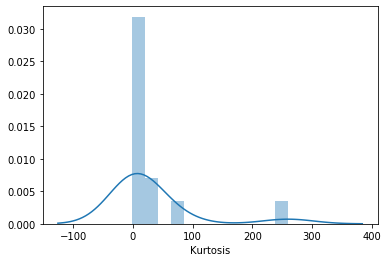

In [10]:
sns.distplot(loans.kurt(),axlabel ='Kurtosis')

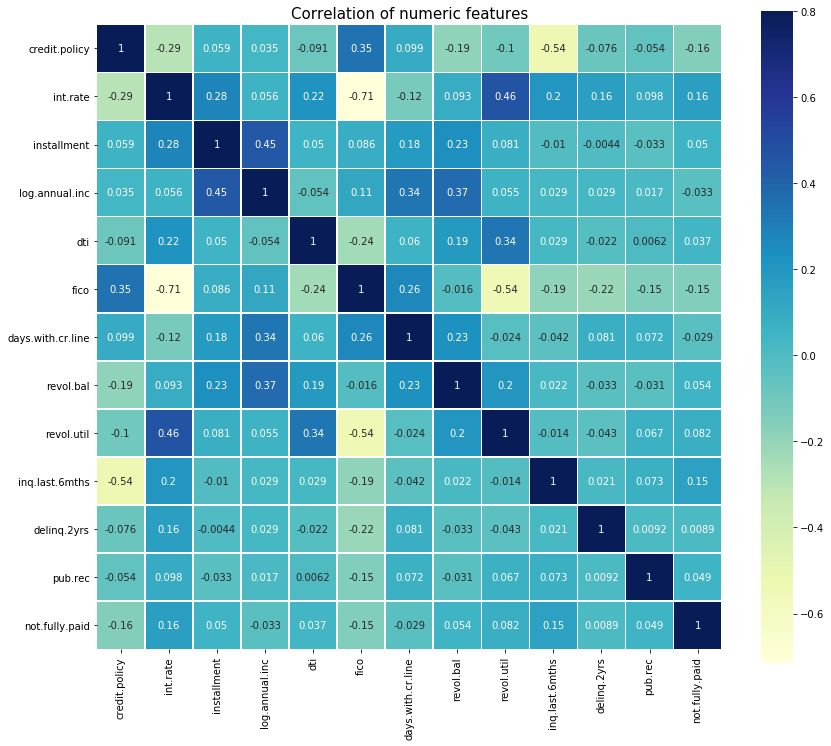

In [90]:
correlation = loans.select_dtypes(include=[np.number]).corr()
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of numeric features',size=15)
sns.heatmap(correlation,square = True,  vmax=0.8,cmap="YlGnBu",linewidth=0.5,annot=True)

Text(0.5, 0, 'FICO')

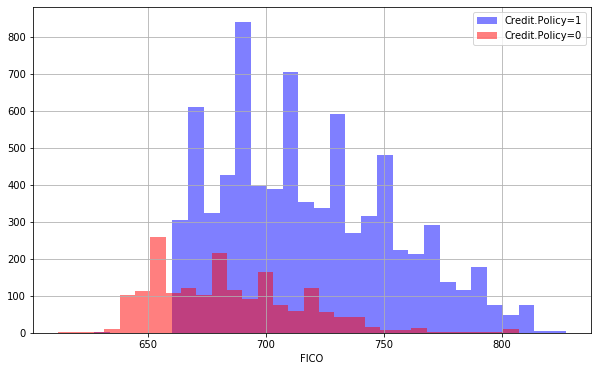

In [11]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

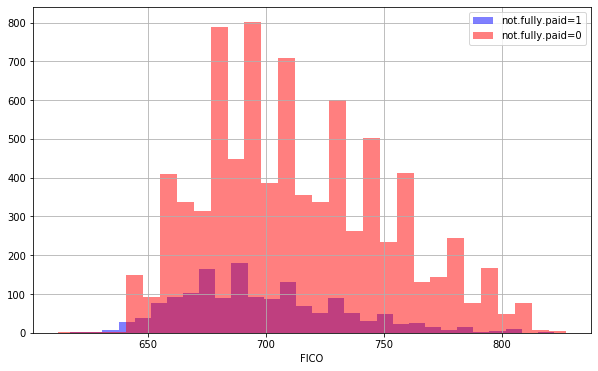

In [12]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

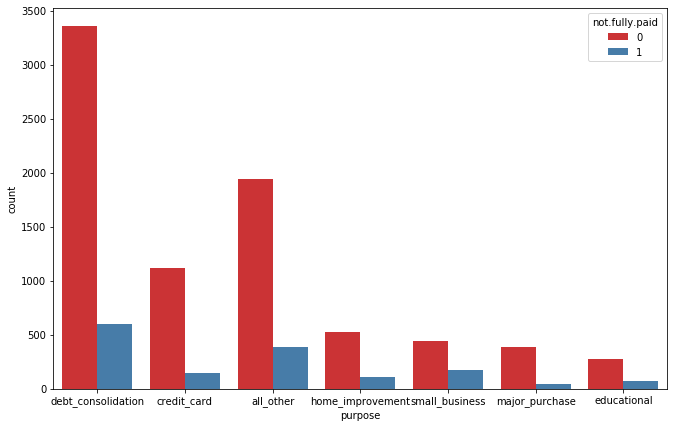

In [13]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

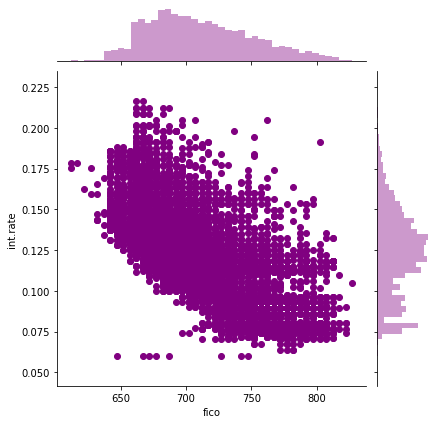

In [14]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<Figure size 792x504 with 0 Axes>

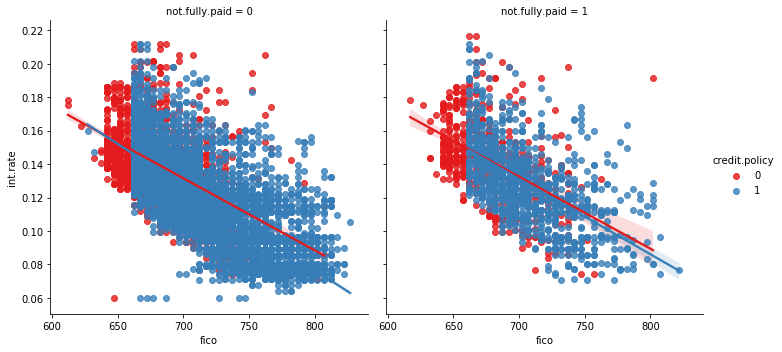

In [15]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [16]:
cat_feats = ['purpose']

In [17]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [20]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [24]:
dtree = DecisionTreeClassifier()

In [25]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
predictions = dtree.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2431
           1       0.19      0.22      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [36]:
print(confusion_matrix(y_test,predictions))

[[2008  423]
 [ 344   99]]


In [52]:
rfc = RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [53]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600, n_jobs=1)

In [54]:
predictions = rfc.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



In [56]:
print(confusion_matrix(y_test,predictions))

[[2423    8]
 [ 435    8]]


In [57]:
Logistic = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)
Logistic.fit(X_train, y_train)

[LibLinear]

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear',
                   verbose=2)

In [58]:
y_pred = Logistic.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [59]:
cm

array([[2417,   14],
       [ 430,   13]], dtype=int64)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.48      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.49      2874
weighted avg       0.79      0.85      0.78      2874



In [63]:
test_labels=Logistic.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.6653329408607591

In [65]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
y_pred = KNN.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [67]:
cm

array([[2335,   96],
       [ 417,   26]], dtype=int64)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2431
           1       0.21      0.06      0.09       443

    accuracy                           0.82      2874
   macro avg       0.53      0.51      0.50      2874
weighted avg       0.75      0.82      0.78      2874



In [69]:
test_labels=KNN.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.5162336004189676

In [79]:
from sklearn.neighbors import KNeighborsClassifier
ADA = AdaBoostClassifier(base_estimator=None, n_estimators=800, learning_rate=1.0)
ADA.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=800)

In [80]:
y_pred = ADA.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cm

array([[2362,   69],
       [ 412,   31]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2431
           1       0.31      0.07      0.11       443

    accuracy                           0.83      2874
   macro avg       0.58      0.52      0.51      2874
weighted avg       0.77      0.83      0.79      2874



In [82]:
test_labels=ADA.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.6251298827317948

In [83]:
from sklearn.neighbors import KNeighborsClassifier
GradientBoo = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)
GradientBoo.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [84]:
y_pred = GradientBoo.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cm

array([[2408,   23],
       [ 427,   16]], dtype=int64)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2431
           1       0.41      0.04      0.07       443

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.49      2874
weighted avg       0.78      0.84      0.78      2874



In [86]:
test_labels=GradientBoo.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.6607569830249422